# Understanding Feature Interactions with SHAP

### Loading Libraries

In [1]:
# Numerical Computing
import numpy as np

# Data Manipulation
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# SHAP
import shap

# Tabulate
from tabulate import tabulate

# Scikit-Learn
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

### A Function with Interactions

In [4]:
np.random.seed(42)

n = 1000

In [6]:
X = pd.DataFrame({
    'x1': np.random.uniform(140, 200, n),
    'x2': np.random.uniform(0, 10, n)
})

y = 0.1 * X.x1 - 1 * X.x2 + 10 * (X.x1 < 160) * (X.x2 > 7) - 8

In [8]:
# Splitting Procedure
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [9]:
# Placing Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting Model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### Distance relate Prediction Viz

In [10]:
x1 = np.linspace(140, 200, 100)
x2 = np.linspace(0, 10, 100)

xx1, xx2 = np.meshgrid(x1, x2)

Xgrid = np.column_stack((xx1.ravel(), xx2.ravel()))

color = rf_model.predict(Xgrid)
color = color.reshape(xx1.shape)

/opt/anaconda3/envs/SHAP/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


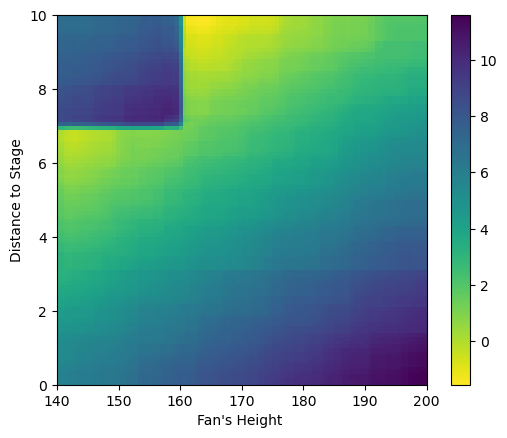

In [15]:
### Heatmap
plt.imshow(color, extent=[x1.min(), x1.max(), x2.min(), x2.max()],
           origin='lower', cmap='viridis_r', aspect=6)

plt.xlabel("Fan's Height ")
plt.ylabel('Distance to Stage')
plt.colorbar()
plt.show()

### Computing SHAP Values

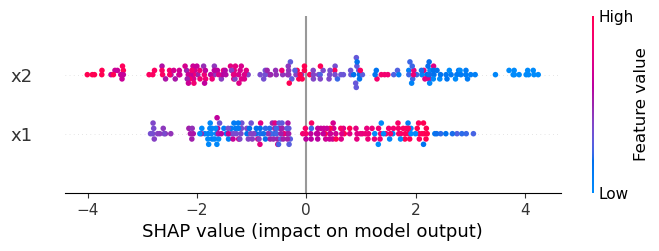

In [18]:
explainer = shap.TreeExplainer(rf_model)

shap_values = explainer(X_test)

shap.plots.beeswarm(shap_values)

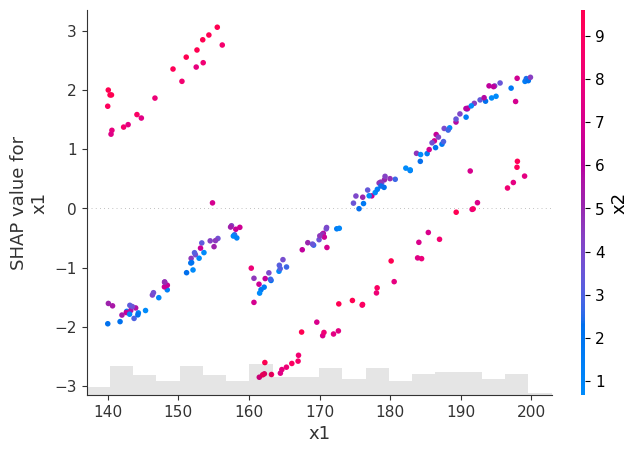

In [19]:
shap.plots.scatter(shap_values[:, 0], color=shap_values)

### SHAP Values Have a "Global" Component

In [20]:
Xnew = pd.DataFrame({"x1": [159, 161], 
                     'x2': [2, 2]})

In [21]:
print("""
Mia: {mia}
Tom: {tom}
Expected: {exp}
""".format(
    mia=round(rf_model.predict(Xnew)[0], 2),
    tom=round(rf_model.predict(Xnew)[1], 2),
    exp=round(explainer.expected_value[0], 2)
))


Mia: 5.97
Tom: 6.2
Expected: 5.05



In [22]:
shap_values = explainer(Xnew)

In [23]:
print('Mia')
print(shap_values[0].values)

print('Tom')
print(shap_values[1].values)

Mia
[-0.35275543  1.27565741]
Tom
[-1.331863    2.48056306]
